In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Leemos la data 
df = pd.read_csv('PeruTipoDeCambio.csv')

In [4]:
df.head()

,Fecha_Cambio,TC_Soles_Dolares,TC_Soles_Euros
0,2002-02-01,3.4757,2.989
1,2002-02-04,3.4824,2.940
2,2002-02-05,3.4846,2.999
3,2002-02-06,3.4858,2.946
4,2002-02-07,3.4835,3.013


In [5]:
# Cambiamos el tipo de dato de date a datetime
df['Fecha_Cambio'] = pd.to_datetime(df['Fecha_Cambio'])

In [6]:
df.head()

,Fecha_Cambio,TC_Soles_Dolares,TC_Soles_Euros
0,2002-02-01,3.4757,2.989
1,2002-02-04,3.4824,2.940
2,2002-02-05,3.4846,2.999
3,2002-02-06,3.4858,2.946
4,2002-02-07,3.4835,3.013


In [7]:
df.tail()

,Fecha_Cambio,TC_Soles_Dolares,TC_Soles_Euros
4963,2022-01-19,3.862500,4.251
4964,2022-01-20,3.844667,4.153
4965,2022-01-21,3.821500,4.227
4966,2022-01-24,3.839000,4.242
4967,2022-01-25,3.847500,4.337


In [8]:
# Se pone como indice la fecha de cambio
df = df.set_index("Fecha_Cambio")

In [9]:
df.head(-1)

,TC_Soles_Dolares,TC_Soles_Euros
Fecha_Cambio,,
2002-02-01,3.475700,2.989
2002-02-04,3.482400,2.940
2002-02-05,3.484600,2.999
2002-02-06,3.485800,2.946
2002-02-07,3.483500,3.013
...,...,...
2022-01-18,3.852833,4.276
2022-01-19,3.862500,4.251
2022-01-20,3.844667,4.153


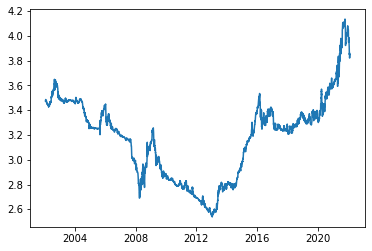

In [10]:
# Mostramos imagen de la variacion del tipo de cambio del dolar en el tiempo
plt.plot(df.TC_Soles_Dolares)

In [11]:
df.shape

(4968, 2)

## Entrenamiento sol_dolar

In [12]:
# Cree un nuevo conjunto de datos con solo la columna TC_Soles_Dolares
data = df.filter(['TC_Soles_Dolares'])

# Convierte el conjunto de datos en una matriz numpy
dataset = data.values

# Obtenemos el número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4720

In [13]:
# Escalamos la data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.58703999],
       [0.59123767],
       [0.59261602],
       ...,
       [0.8036905 ],
       [0.81465459],
       [0.81998001]])

In [14]:
# Creamos el conjunto de datos de entrenamiento
# Creamos el conjunto de datos de entrenamiento escalado
train_data = scaled_data[0:int(training_data_len), :]

# Dividimos los datos en conjuntos de datos x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convierte x_train y y_train en matrices numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Reformamos los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.58703999, 0.59123767, 0.59261602, 0.59336784, 0.59192685,
       0.59386906, 0.59224011, 0.58584961, 0.58584961, 0.58578695,
       0.58215314, 0.58190253, 0.58378209, 0.58534839, 0.58660143,
       0.58891955, 0.58591226, 0.58490983, 0.58303027, 0.58321822,
       0.58240375, 0.57826872, 0.5760759 , 0.57532407, 0.57263004,
       0.57388308, 0.57244208, 0.571377  , 0.57100109, 0.57263004,
       0.57319391, 0.57432164, 0.57444695, 0.57419634, 0.57319391,
       0.57200352, 0.57081313, 0.56761788, 0.5666781 , 0.57156496,
       0.57018661, 0.56830705, 0.56686606, 0.56711667, 0.56586363,
       0.56548772, 0.56605158, 0.56417202, 0.5632949 , 0.55778152,
       0.55753092, 0.55828274, 0.55646583, 0.557155  , 0.55909721,
       0.56160329, 0.56291899, 0.56279368, 0.56222981, 0.56066351])]
[0.560350254337157]

[array([0.58703999, 0.59123767, 0.59261602, 0.59336784, 0.59192685,
       0.59386906, 0.59224011, 0.58584961, 0.58584961, 0.58578695,
       0.58215314, 0.58190253, 0.5837

## Red LSTM

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Construyendo el modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Complilando el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenando el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

4660/4660 [==============================] - 150s 32ms/step - loss: 9.9845e-04


In [16]:
#Guardando el modelo
model.save('keras_model1.h5')

In [17]:
# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]

# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
# Convierte los datos en una matriz numpy
x_test = np.array(x_test)

# Reshape the data
# Reforma los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
# Obtenga los valores de precios predichos de los modelos
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
# Obtener la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.027451927483925005

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


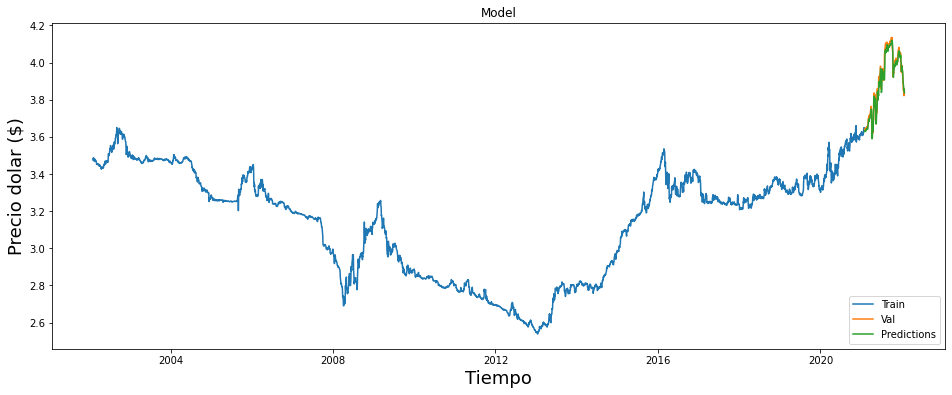

In [18]:
# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualizamos la comparacion de entrenamiento, validacion y prediccion
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Tiempo', fontsize=18)
plt.ylabel('Precio dolar ($)', fontsize=18)
plt.plot(train['TC_Soles_Dolares'])
plt.plot(valid[['TC_Soles_Dolares', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

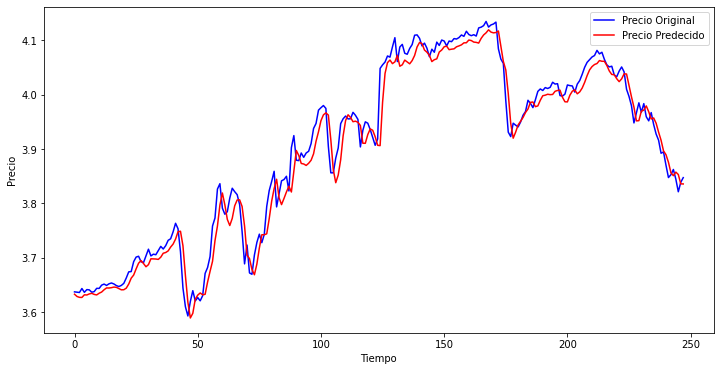

In [19]:
# Visuslaizamos una grafica del Precio predecido vs Precio Original
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Precio Original')
plt.plot(predictions, 'r', label= 'Precio Predecido')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [20]:
# Mostramos los precios válidos y los previstos del dolar
valid

,TC_Soles_Dolares,Predictions
Fecha_Cambio,,
2021-02-01,3.637333,3.633013
2021-02-02,3.636833,3.628864
2021-02-03,3.636167,3.627239
2021-02-04,3.643500,3.627059
2021-02-05,3.636500,3.631857
...,...,...
2022-01-19,3.862500,3.851080
2022-01-20,3.844667,3.857653
2022-01-21,3.821500,3.853208


# Entrenamiento sol_Euro

In [21]:
df.head()

,TC_Soles_Dolares,TC_Soles_Euros
Fecha_Cambio,,
2002-02-01,3.4757,2.989
2002-02-04,3.4824,2.940
2002-02-05,3.4846,2.999
2002-02-06,3.4858,2.946
2002-02-07,3.4835,3.013


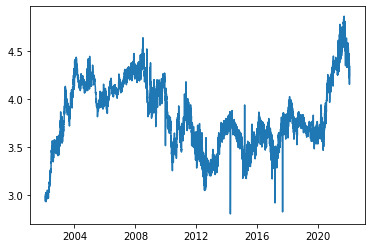

In [22]:
# Mostramos imagen de la variacion del tipo de cambio del euro en el tiempo
plt.plot(df.TC_Soles_Euros)

In [23]:
df.shape

(4968, 2)

In [24]:
# Cree un nuevo conjunto de datos con solo la columna TC_Soles_Euros
data = df.filter(['TC_Soles_Euros'])
# Convierte el conjunto de datos en una matriz numpy
dataset = data.values
# Obtenemos el número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4720

In [25]:
# Escalamos la data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08780488],
       [0.06390244],
       [0.09268293],
       ...,
       [0.69170732],
       [0.69902439],
       [0.74536585]])

In [26]:
# Creamos el conjunto de datos de entrenamiento
# Creamos el conjunto de datos de entrenamiento escalado
train_data = scaled_data[0:int(training_data_len), :]

# Dividimos los datos en conjuntos de datos x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convierte x_train y y_train en matrices numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Reformamos los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.08780488, 0.06390244, 0.09268293, 0.06682927, 0.0995122 ,
       0.1004878 , 0.09073171, 0.10487805, 0.09268293, 0.08439024,
       0.09317073, 0.06146341, 0.10243902, 0.10487805, 0.08585366,
       0.10682927, 0.09073171, 0.0702439 , 0.09902439, 0.09170732,
       0.08634146, 0.08780488, 0.09414634, 0.09512195, 0.0995122 ,
       0.10682927, 0.10487805, 0.09609756, 0.1       , 0.10682927,
       0.10292683, 0.10682927, 0.07804878, 0.10634146, 0.12      ,
       0.11121951, 0.10585366, 0.09804878, 0.10390244, 0.09707317,
       0.1102439 , 0.10829268, 0.1097561 , 0.0995122 , 0.10585366,
       0.0995122 , 0.10487805, 0.10536585, 0.10829268, 0.0795122 ,
       0.09512195, 0.11121951, 0.11317073, 0.11121951, 0.11317073,
       0.10878049, 0.12634146, 0.11804878, 0.13414634, 0.13560976])]
[0.138048780487805]

[array([0.08780488, 0.06390244, 0.09268293, 0.06682927, 0.0995122 ,
       0.1004878 , 0.09073171, 0.10487805, 0.09268293, 0.08439024,
       0.09317073, 0.06146341, 0.1024

# Red LSTM

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Construyendo el modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilando el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenando el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

4660/4660 [==============================] - 148s 31ms/step - loss: 0.0030


In [28]:
# Guardando el modelo 
model.save('keras_model2.h5')

In [29]:
# Crear el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]

# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convierte los datos en una matriz numpy
x_test = np.array(x_test)

# Reformamos los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Obtenemos los valores de precios predichos del modelo
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Obtenemos la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.09655003306302458

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


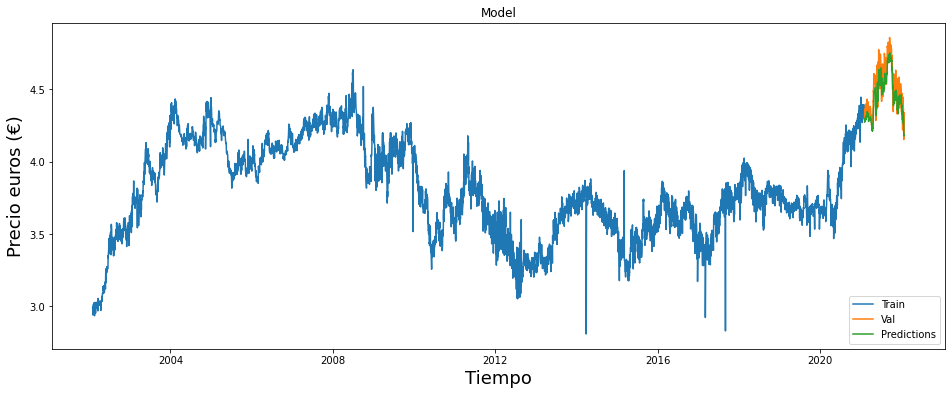

In [30]:
# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualizamos la comparacion de entrenamiento, validacion y prediccion
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Tiempo', fontsize=18)
plt.ylabel('Precio euros (€)', fontsize=18)
plt.plot(train['TC_Soles_Euros'])
plt.plot(valid[['TC_Soles_Euros', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

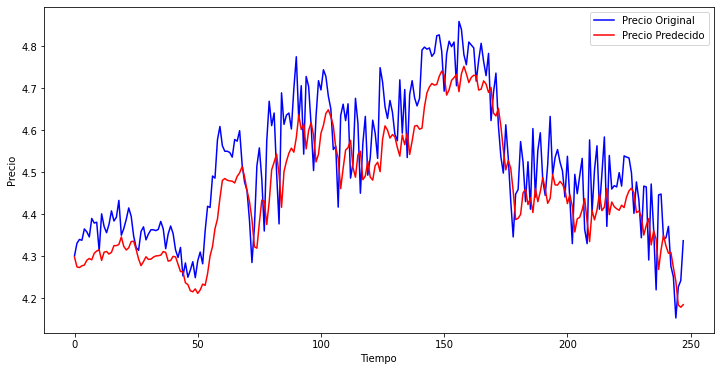

In [31]:
# Visuslaizamos una grafica del Precio predecido vs Precio Original
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Precio Original')
plt.plot(predictions, 'r', label= 'Precio Predecido')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [32]:
# Mostrar los precios válidos y los previstos del euro
valid

,TC_Soles_Euros,Predictions
Fecha_Cambio,,
2021-02-01,4.301,4.297852
2021-02-02,4.331,4.274588
2021-02-03,4.340,4.273057
2021-02-04,4.338,4.277228
2021-02-05,4.365,4.279040
...,...,...
2022-01-19,4.251,4.273004
2022-01-20,4.153,4.240536
2022-01-21,4.227,4.183728


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bec4fde9-3271-4973-9805-8dd1c303c5ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>